# A10: Association Rule Mining
Alex Dien
11/21/22

# Table of Contents

>[A10: Association Rule Mining](#scrollTo=Hk0FF9Wsr-KO)

>[Table of Contents](#scrollTo=mo2g0z7dtnWo)

>[Task 1](#scrollTo=qsR-rr7MsX4U)

>>>[A. Install apriori](#scrollTo=5YQ09-P_uuxC)

>>>[B. Import walmart baskets](#scrollTo=CY13OGHlu7cx)

>[Task 2](#scrollTo=Dc1iMMD8sdIs)

>>[Show the length of data set](#scrollTo=hbvWhC2UvhEz)

>>[Show the first entry of the list](#scrollTo=47TwDd7dnYTn)

>>[Show the 10th - 15th entries of the list](#scrollTo=X9zvB9onFdSw)

>>[Flatten the list and plot a horizontal barchart of the list of words by their counts](#scrollTo=8SriWAzEFsO_)

>[Task 3](#scrollTo=ZdAY1o-crYDv)

>>[Using apriori to show 10-15 items by changing the confidence, support, lift to reduce the number.](#scrollTo=nta4V8mfrlUG)

>>>[Use the parse results function from the tutorial to show a more readable version of the apriori output.](#scrollTo=clEO1BohsVnD)

>>>[In a text block describe any interesting patterns that you see in the output you have created.](#scrollTo=ojo261fC8zy9)

>[Task 4 - Kmeans](#scrollTo=oQgf00QvYLCK)

>>>[Using apriori to show 3-5 items by changing the confidence, support, lift to reduce the number.](#scrollTo=e1GhnEFEi-bc)

>>>[Using the function show a more readable version of the output.](#scrollTo=GE693Lbu1Juz)

>[Task 4B - Scatterplot](#scrollTo=ojegAqZQoML9)

>>[Create TWO graphs using the following method. These graphs should each show different column results](#scrollTo=kbxtSk7GoRVZ)

>>[1.1 Using seaborn to visualize the results of your clustering for by using a scatter plot, choose two columns (your choice as to which two) and highlight the points using the predicted_clusters column.](#scrollTo=2PXSRVJmoZAn)

>>[1.2 Add a title, and axis labels to your plot to describe the plot](#scrollTo=kSJh8llkoejG)

>>[1.3 In a text box below describe how well separated the clusters are by these two variables. Is there a lot of overlap or are there clear clusters and good separation between clusters? Do any particular clusters stand out as particularly unique in the boxplot?](#scrollTo=nsmmkTRMojoD)

>[Task 4C - Boxplot](#scrollTo=1PjvY40XhUfg)

>>[1.1 Create a 2 boxplots grouped by cluster. You choose which columns to explore. They CANNOT be columns you used in the scatter plot.](#scrollTo=SpH-NhKwqv_9)

>>[1.2 In a textbox describe the separation the clustering achieved for each of these features. Are the boxplots overlapping? Which two clusters are the most dissimilar based on these two features. Which are the most similar?](#scrollTo=vkJ4Cdmmq0M9)

>[Task 5 - PCA](#scrollTo=mT1xBvRAqpzK)

>>[Fit and transform our scaled data using a PCA object using 3 dimensions on our scaled dataframe.](#scrollTo=IjvZ5epkrgXJ)

>>[Save the results in a new dataframe.](#scrollTo=nW1EfxuYrlXc)

>>[Explain how many dimensions we have reduced our dataset from.](#scrollTo=nSqrfQG7rl_e)

>>[Sum up the explained variance and show the total. How much variance in our dataset do only 3 dimensions explain?](#scrollTo=qNlcBLKyrmQi)

>[Task 6 - Kmeans with PCA](#scrollTo=DlG0E7aurbN0)

>>[Fit a KMeans object to our new reduced PCA dataset](#scrollTo=gKPN53j1r0wg)

>>[Predict the cluster using the new KMeans object](#scrollTo=E3zm5JfOr4dd)

>>[Save the prediction in a 'predicted_cluster' column](#scrollTo=VDi5NCk0r44_)

>>[Plot Principal Component 1 and 2 using seaborn scatterplot and highlight/hue the predicted cluster](#scrollTo=LuAu5afvr4_v)

>>[In a text block explain if using PCA we have been more successful in visualizing the clusters than we were using our best model before applying PCA. Explain your argument well.](#scrollTo=g-eb5P9Ir5FB)

>[Mounting](#scrollTo=i47GfPbpruW0)



# Task 1

### A. Install apriori

In [1]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5973 sha256=182b169c962a9edfb81d33dff58096118b319f41e10d23bac96d5df66b04df08
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [2]:
# install libraries
import csv
from apyori import apriori
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### B. Import walmart baskets 

In [3]:
!wget "https://raw.githubusercontent.com/matthewpecsok/4482_fall_2022/main/data/Walmart_baskets_1week_lst-1.csv"

--2022-11-23 02:52:36--  https://raw.githubusercontent.com/matthewpecsok/4482_fall_2022/main/data/Walmart_baskets_1week_lst-1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96621 (94K) [text/plain]
Saving to: ‘Walmart_baskets_1week_lst-1.csv’

Walmart_baskets_1we 100%[===================>]  94.36K  --.-KB/s    in 0.01s   

2022-11-23 02:52:36 (6.63 MB/s) - ‘Walmart_baskets_1week_lst-1.csv’ saved [96621/96621]



In [4]:
with open('Walmart_baskets_1week_lst-1.csv', newline='') as f:
  reader = csv.reader(f)
  walmart_baskets = list(reader)

# Task 2


## 1. Show the length of data set


In [5]:
len(walmart_baskets)

2000

## 2. Show the first entry of the list



In [6]:
walmart_baskets[0]

['FABRICS AND CRAFTS']

## 3. Show the 10th - 15th entries of the list



In [7]:
walmart_baskets[10:15]

[['BRAS & SHAPEWEAR', 'PHARMACY OTC'],
 ['JEWELRY AND SUNGLASSES'],
 ['CANDY', ' TOBACCO', ' COOKIES', 'DSD GROCERY'],
 ['SHOES'],
 ['FINANCIAL SERVICES']]

## 4. Flatten the list and plot a horizontal barchart of the list of words by their counts


In [8]:
flattened_list = [item for sublist in walmart_baskets for item in sublist]
flattened_list[0:20]

['FABRICS AND CRAFTS',
 'HARDWARE',
 'PERSONAL CARE',
 'PHARMACY OTC',
 'FROZEN FOODS',
 'PRODUCE',
 'SEAFOOD',
 'FROZEN FOODS',
 'LADIESWEAR',
 'FINANCIAL SERVICES',
 'FINANCIAL SERVICES',
 'CANDY',
 ' TOBACCO',
 ' COOKIES',
 'DSD GROCERY',
 'HOUSEHOLD PAPER GOODS',
 'BEAUTY',
 'FINANCIAL SERVICES',
 'IMPULSE MERCHANDISE',
 'BRAS & SHAPEWEAR']

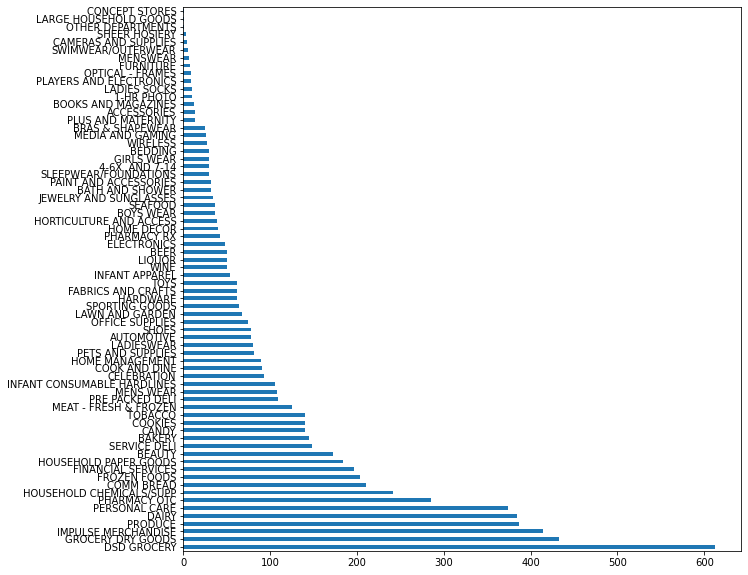

In [9]:
pd.get_dummies(flattened_list).sum().sort_values(ascending=False).plot(kind='barh',figsize=(10,10))

# Task 3

## 1.  Using apriori to show 10-15 items by changing the confidence, support, lift to reduce the number.


In [15]:
association_rules = apriori(walmart_baskets, min_support=0.06, min_confidence=0.6, min_lift=1.01) 
association_results = list(association_rules)

association_results

[RelationRecord(items=frozenset({' TOBACCO', ' COOKIES'}), support=0.07, ordered_statistics=[OrderedStatistic(items_base=frozenset({' COOKIES'}), items_add=frozenset({' TOBACCO'}), confidence=1.0, lift=14.285714285714285), OrderedStatistic(items_base=frozenset({' TOBACCO'}), items_add=frozenset({' COOKIES'}), confidence=1.0, lift=14.285714285714285)]),
 RelationRecord(items=frozenset({'CANDY', ' COOKIES'}), support=0.07, ordered_statistics=[OrderedStatistic(items_base=frozenset({' COOKIES'}), items_add=frozenset({'CANDY'}), confidence=1.0, lift=14.285714285714285), OrderedStatistic(items_base=frozenset({'CANDY'}), items_add=frozenset({' COOKIES'}), confidence=1.0, lift=14.285714285714285)]),
 RelationRecord(items=frozenset({' TOBACCO', 'CANDY'}), support=0.07, ordered_statistics=[OrderedStatistic(items_base=frozenset({' TOBACCO'}), items_add=frozenset({'CANDY'}), confidence=1.0, lift=14.285714285714285), OrderedStatistic(items_base=frozenset({'CANDY'}), items_add=frozenset({' TOBACCO'}

### 2. Use the parse results function from the tutorial to show a more readable version of the apriori output. 


In [11]:
def parse_results(rules):
  for item in rules:
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])
    print("Support: " + str(item[1]))
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("-------------")

In [37]:
parse_results(association_results)

Rule:  TOBACCO ->  COOKIES
Support: 0.07
Confidence: 1.0
Lift: 14.285714285714285
-------------
Rule: CANDY ->  COOKIES
Support: 0.07
Confidence: 1.0
Lift: 14.285714285714285
-------------
Rule:  TOBACCO -> CANDY
Support: 0.07
Confidence: 1.0
Lift: 14.285714285714285
-------------
Rule: DAIRY -> COMM BREAD
Support: 0.065
Confidence: 0.6190476190476191
Lift: 3.2242063492063493
-------------
Rule: DSD GROCERY -> COMM BREAD
Support: 0.0735
Confidence: 0.7
Lift: 2.287581699346405
-------------
Rule: COMM BREAD -> GROCERY DRY GOODS
Support: 0.0765
Confidence: 0.7285714285714285
Lift: 3.3652259980204553
-------------
Rule: DAIRY -> DSD GROCERY
Support: 0.1225
Confidence: 0.6380208333333333
Lift: 2.085035403050109
-------------
Rule: DAIRY -> FROZEN FOODS
Support: 0.062
Confidence: 0.6108374384236452
Lift: 3.181444991789819
-------------
Rule: DAIRY -> GROCERY DRY GOODS
Support: 0.117
Confidence: 0.609375
Lift: 2.814665127020785
-------------
Rule: DSD GROCERY -> FROZEN FOODS
Support: 0.0725


### 3. In a text block describe any interesting patterns that you see in the output you have created. 

I noticed that within rules:

TOBACCO ->  COOKIES
CANDY ->  COOKIES
TOBACCO -> CANDY

all have a lift above 14, while the others had a lift of sub 3. 
Interesting, because they also are the only ones with a confidence of 1.0

# Task 4

### 1. Using apriori to show 3-5 items by changing the confidence, support, lift to reduce the number.

In [16]:
association_rules2 = apriori(walmart_baskets, min_support=0.1, min_confidence=0.6, min_lift=1.41) 
association_results2 = list(association_rules2)

association_results2

[RelationRecord(items=frozenset({'DAIRY', 'DSD GROCERY'}), support=0.1225, ordered_statistics=[OrderedStatistic(items_base=frozenset({'DAIRY'}), items_add=frozenset({'DSD GROCERY'}), confidence=0.6380208333333333, lift=2.085035403050109)]),
 RelationRecord(items=frozenset({'DAIRY', 'GROCERY DRY GOODS'}), support=0.117, ordered_statistics=[OrderedStatistic(items_base=frozenset({'DAIRY'}), items_add=frozenset({'GROCERY DRY GOODS'}), confidence=0.609375, lift=2.814665127020785)]),
 RelationRecord(items=frozenset({'DSD GROCERY', 'GROCERY DRY GOODS'}), support=0.1305, ordered_statistics=[OrderedStatistic(items_base=frozenset({'GROCERY DRY GOODS'}), items_add=frozenset({'DSD GROCERY'}), confidence=0.6027713625866051, lift=1.9698410542045919)])]

### 2. Using the function show a more readable version of the output. 




In [17]:
parse_results(association_results2)

Rule: DAIRY -> DSD GROCERY
Support: 0.1225
Confidence: 0.6380208333333333
Lift: 2.085035403050109
-------------
Rule: DAIRY -> GROCERY DRY GOODS
Support: 0.117
Confidence: 0.609375
Lift: 2.814665127020785
-------------
Rule: DSD GROCERY -> GROCERY DRY GOODS
Support: 0.1305
Confidence: 0.6027713625866051
Lift: 1.9698410542045919
-------------


## 3. In a text block describe any interesting patterns that you see in the output you have created. 

- The rules with 'Dairy' as L1 both contain a lift level above 2.0
- The rules with 'Grocery Dry Goods' as L2 both have a confidence level of 0.60
- DSD GROCERY -> GROCERY DRY GOODS is the only rule with a lift below 2.0

# Task 5


## 1. Using apriori to show 1-2 items.



In [35]:
association_rules3 = apriori(walmart_baskets, min_support=0.1, min_confidence=0.6, min_lift=2) 
association_results3 = list(association_rules3)

association_results3

[RelationRecord(items=frozenset({'DAIRY', 'DSD GROCERY'}), support=0.1225, ordered_statistics=[OrderedStatistic(items_base=frozenset({'DAIRY'}), items_add=frozenset({'DSD GROCERY'}), confidence=0.6380208333333333, lift=2.085035403050109)]),
 RelationRecord(items=frozenset({'DAIRY', 'GROCERY DRY GOODS'}), support=0.117, ordered_statistics=[OrderedStatistic(items_base=frozenset({'DAIRY'}), items_add=frozenset({'GROCERY DRY GOODS'}), confidence=0.609375, lift=2.814665127020785)])]

## 2. Similar to Code chunks 3 & 4, apriori is used to show 1-2 items and printing the list returned. The confidence, support and lift are all changed in this code chunk to help reduce it to 1-2 items. Again, the function used previously is used to print a more readable version of the list.



## 3. Using the function show a more readable version of the output. 



In [36]:
parse_results(association_results3)

Rule: DAIRY -> DSD GROCERY
Support: 0.1225
Confidence: 0.6380208333333333
Lift: 2.085035403050109
-------------
Rule: DAIRY -> GROCERY DRY GOODS
Support: 0.117
Confidence: 0.609375
Lift: 2.814665127020785
-------------


## 4. In a text block describe any interesting patterns that you see in the output you have created. 


Both rules use DAIRY as L1 and share similar values. I noticed that support levels are below 0.13 for both, confidence levels are below 0.65, and lift values are below 3.0.

# Task 7

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!cp "/content/drive/My Drive/Colab Notebooks/A9_Dien_Alex.ipynb" ./

# create html from ipynb
!jupyter nbconvert --to html "A9_Dien_Alex.ipynb"

[NbConvertApp] Converting notebook A9_Dien_Alex.ipynb to html
[NbConvertApp] Writing 896146 bytes to A9_Dien_Alex.html
